In [ ]:
!nvidia-smi

Tue Feb 15 09:14:20 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 497.5 MB 24 kB/s 
     |████████████████████████████████| 5.8 MB 35.6 MB/s 
     |████████████████████████████████| 462 kB 37.1 MB/s 
     |████████████████████████████████| 1.4 MB 44.9 MB/s 
     |████████████████████████████████| 15.7 MB 35.3 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you hav

In [ ]:
import pandas as pd                                    # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np                                     # linear algebra
from sklearn.linear_model import LinearRegression      # import linear regression package
import matplotlib.pyplot as plt                        # import plot library
from sklearn.model_selection import train_test_split   #import train test split package

In [ ]:
data =  pd.read_csv('/content/drive/MyDrive/Datasets/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')

In [ ]:
data.head(5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.0,32.0,NaN,NaN,30.5,33.5,7304.0,Total,NaN,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.3,32.3,NaN,NaN,29.9,34.7,2581.0,NaN,NaN,NaN,Male,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,31.8,31.8,NaN,NaN,30.0,33.6,4723.0,NaN,NaN,NaN,Female,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,33.6,33.6,NaN,NaN,29.9,37.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,32.8,32.8,NaN,NaN,30.2,35.6,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

In [ ]:
data.describe()

,YearStart,YearEnd,Data_Value_Unit,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
count,53392.000000,53392.000000,0.0,48346.000000,48346.000000,48346.000000,48346.000000,48346.00000,53392.000000
mean,2013.281465,2013.281465,NaN,31.156681,31.156681,26.892227,35.989997,3889.19286,30.282215
std,1.693300,1.693300,NaN,10.247033,10.247033,10.038584,11.205813,19829.42129,16.821318
min,2011.000000,2011.000000,NaN,0.900000,0.900000,0.300000,3.000000,50.00000,1.000000
25%,2012.000000,2012.000000,NaN,24.100000,24.100000,20.000000,28.200000,566.00000,17.000000
50%,2013.000000,2013.000000,NaN,30.700000,30.700000,26.450000,35.600000,1209.00000,30.000000
75%,2015.000000,2015.000000,NaN,37.000000,37.000000,32.900000,42.200000,2519.00000,44.000000
max,2016.000000,2016.000000,NaN,77.600000,77.600000,69.500000,87.700000,476876.00000,78.000000


In [ ]:
wrangled = data[data['StratificationID1'] == 'OVERALL'][['LocationDesc','Data_Value', 'Question', "YearStart" ]]
question = wrangled[wrangled['Question'] == 'Percent of adults who engage in no leisure-time physical activity'][['LocationDesc','Data_Value', 'Question', "YearStart" ]]
x_all = question[question['YearStart'] == 2014][['LocationDesc','Data_Value' ]]
x = question[question['YearStart'] == 2014][['Data_Value' ]].values
x 
# denotes Percent of adults who engage in no leisure-time physical activity


array([[27.6],
       [19.2],
       [21.2],
       [30.7],
       [21.7],
       [16.4],
       [20.6],
       [24.9],
       [20.8],
       [23.7],
       [23.6],
       [27.7],
       [19.6],
       [18.7],
       [23.9],
       [26.1],
       [22.6],
       [23.8],
       [28.2],
       [29.5],
       [19.7],
       [21.4],
       [20.1],
       [25.5],
       [20.2],
       [31.6],
       [25. ],
       [19.6],
       [23.7],
       [21.3],
       [22.5],
       [19.3],
       [23.3],
       [23.3],
       [25.9],
       [23.2],
       [21.3],
       [25. ],
       [28.3],
       [16.5],
       [23.3],
       [40.6],
       [22.5],
       [25.3],
       [21.2],
       [26.8],
       [27.6],
       [16.8],
       [19. ],
       [23.5],
       [18.1],
       [28.7],
       [21.2],
       [22.1]])

In [ ]:
wrangled = data[data['StratificationID1'] == 'OVERALL'][['LocationDesc','Data_Value', 'Question', "YearStart" ]]
year = wrangled[wrangled['Question'] == 'Percent of adults aged 18 years and older who have obesity'][['LocationDesc','Data_Value', 'Question', "YearStart" ]]
y_all = year[year['YearStart'] == 2014][['LocationDesc','Data_Value' ]]
y = year[year['YearStart'] == 2014][['Data_Value' ]].values
y 
 # denotes Percent of adults aged 18 years and older who have obesity

array([[33.5],
       [29.7],
       [28.9],
       [35.9],
       [24.7],
       [21.3],
       [26.3],
       [30.7],
       [21.7],
       [26.2],
       [30.5],
       [28. ],
       [22.1],
       [28.9],
       [29.3],
       [32.7],
       [30.9],
       [31.3],
       [31.6],
       [34.9],
       [28.2],
       [29.6],
       [23.3],
       [30.7],
       [27.6],
       [35.5],
       [30.2],
       [26.4],
       [28.9],
       [30.2],
       [27.7],
       [27.4],
       [26.9],
       [28.4],
       [27. ],
       [29.7],
       [32.2],
       [32.6],
       [33. ],
       [27.9],
       [30.2],
       [28.3],
       [27. ],
       [32.1],
       [29.8],
       [31.2],
       [31.9],
       [25.7],
       [24.8],
       [28.5],
       [27.3],
       [35.7],
       [31.2],
       [29.5]])

In [ ]:
x = x.reshape(-1, 1)
x

array([[27.6],
       [19.2],
       [21.2],
       [30.7],
       [21.7],
       [16.4],
       [20.6],
       [24.9],
       [20.8],
       [23.7],
       [23.6],
       [27.7],
       [19.6],
       [18.7],
       [23.9],
       [26.1],
       [22.6],
       [23.8],
       [28.2],
       [29.5],
       [19.7],
       [21.4],
       [20.1],
       [25.5],
       [20.2],
       [31.6],
       [25. ],
       [19.6],
       [23.7],
       [21.3],
       [22.5],
       [19.3],
       [23.3],
       [23.3],
       [25.9],
       [23.2],
       [21.3],
       [25. ],
       [28.3],
       [16.5],
       [23.3],
       [40.6],
       [22.5],
       [25.3],
       [21.2],
       [26.8],
       [27.6],
       [16.8],
       [19. ],
       [23.5],
       [18.1],
       [28.7],
       [21.2],
       [22.1]])

In [ ]:
y = y.reshape(-1, 1)
y

array([[33.5],
       [29.7],
       [28.9],
       [35.9],
       [24.7],
       [21.3],
       [26.3],
       [30.7],
       [21.7],
       [26.2],
       [30.5],
       [28. ],
       [22.1],
       [28.9],
       [29.3],
       [32.7],
       [30.9],
       [31.3],
       [31.6],
       [34.9],
       [28.2],
       [29.6],
       [23.3],
       [30.7],
       [27.6],
       [35.5],
       [30.2],
       [26.4],
       [28.9],
       [30.2],
       [27.7],
       [27.4],
       [26.9],
       [28.4],
       [27. ],
       [29.7],
       [32.2],
       [32.6],
       [33. ],
       [27.9],
       [30.2],
       [28.3],
       [27. ],
       [32.1],
       [29.8],
       [31.2],
       [31.9],
       [25.7],
       [24.8],
       [28.5],
       [27.3],
       [35.7],
       [31.2],
       [29.5]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.8, test_size=.2, random_state=100)

In [ ]:
print(f'X Train Data shape{x_train.shape}')
print(f'y Train Data shape{y_train.shape}')
print(f'X Test Data shape{x_test.shape}')
print(f'y Test Data shape{y_test.shape}')

X Train Data shape(43, 1)
y Train Data shape(43, 1)
X Test Data shape(11, 1)
y Test Data shape(11, 1)


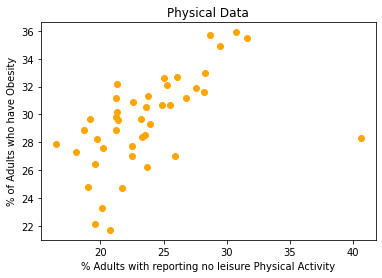

In [ ]:
plt.scatter(x_train, y_train, color='orange')
plt.xlabel('% Adults with reporting no leisure Physical Activity')
plt.ylabel('% of Adults who have Obesity')
plt.title('Physical Data')
plt.show()

In [ ]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)

In [ ]:
print(f'Train Accuracy {round(lm.score(x_train, y_train)* 100,2)}%')
print(f'Test Accuracy {round(lm.score(x_test, y_test)* 100,2)}%')

Train Accuracy 29.76%
Test Accuracy 44.09%


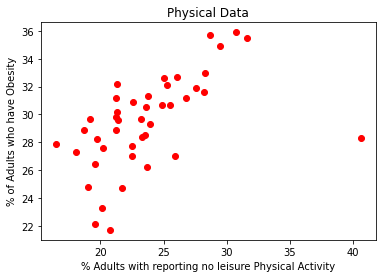

In [ ]:
plt.scatter(x_train, y_train, color='red')
plt.xlabel('% Adults with reporting no leisure Physical Activity')
plt.ylabel('% of Adults who have Obesity')
plt.title('Physical Data')
plt.show()

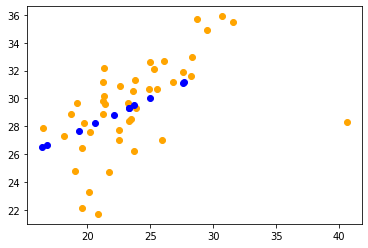

In [ ]:
plt.scatter(x_train, y_train, color = 'orange')
plt.scatter(x_test, y_predict, color = 'blue')
plt.show()